In [6]:
# LOAD AND INSPECT THE DATA
import pandas as pd

# Load data
df = pd.read_csv("customer_support_tickets.csv")

# Preview
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [9]:
#CLEAN AND PREPARE THE DATA
# Convert datetime columns
df["First Response Time"] = pd.to_datetime(df["First Response Time"], errors='coerce')
df["Time to Resolution"] = pd.to_datetime(df["Time to Resolution"], errors='coerce')

# Calculate resolution time in hours
df["Resolution Hours"] = (df["Time to Resolution"] - df["First Response Time"]).dt.total_seconds() / 3600

# Drop rows with missing values in important columns
df = df.dropna(subset=["Ticket Type", "Ticket Subject", "Resolution Hours"])


In [10]:
# TOP ISSUES BY FREQUENCY
# Top ticket types
top_types = df["Ticket Type"].value_counts().head(10)

# Top ticket subjects
top_subjects = df["Ticket Subject"].value_counts().head(10)

print("Top Ticket Types:\n", top_types)
print("\nTop Ticket Subjects:\n", top_subjects)


Top Ticket Types:
 Ticket Type
Refund request          596
Technical issue         580
Billing inquiry         544
Product inquiry         533
Cancellation request    516
Name: count, dtype: int64

Top Ticket Subjects:
 Ticket Subject
Network problem           201
Software bug              199
Product compatibility     195
Product recommendation    186
Product setup             183
Hardware issue            183
Delivery problem          178
Refund request            178
Battery life              173
Account access            171
Name: count, dtype: int64


In [11]:
#RESOLUTION TIME ANALYSIS
# Average resolution by type
avg_res_type = df.groupby("Ticket Type")["Resolution Hours"].mean().sort_values(ascending=False)

# Average resolution by priority
avg_res_priority = df.groupby("Ticket Priority")["Resolution Hours"].mean().sort_values(ascending=False)

print("Average Resolution Time by Ticket Type:\n", avg_res_type)
print("\nAverage Resolution Time by Priority:\n", avg_res_priority)


Average Resolution Time by Ticket Type:
 Ticket Type
Refund request          0.218037
Technical issue         0.066466
Cancellation request   -0.165924
Billing inquiry        -0.207813
Product inquiry        -0.243183
Name: Resolution Hours, dtype: float64

Average Resolution Time by Priority:
 Ticket Priority
Low         0.385223
High       -0.068818
Critical   -0.200689
Medium     -0.307853
Name: Resolution Hours, dtype: float64


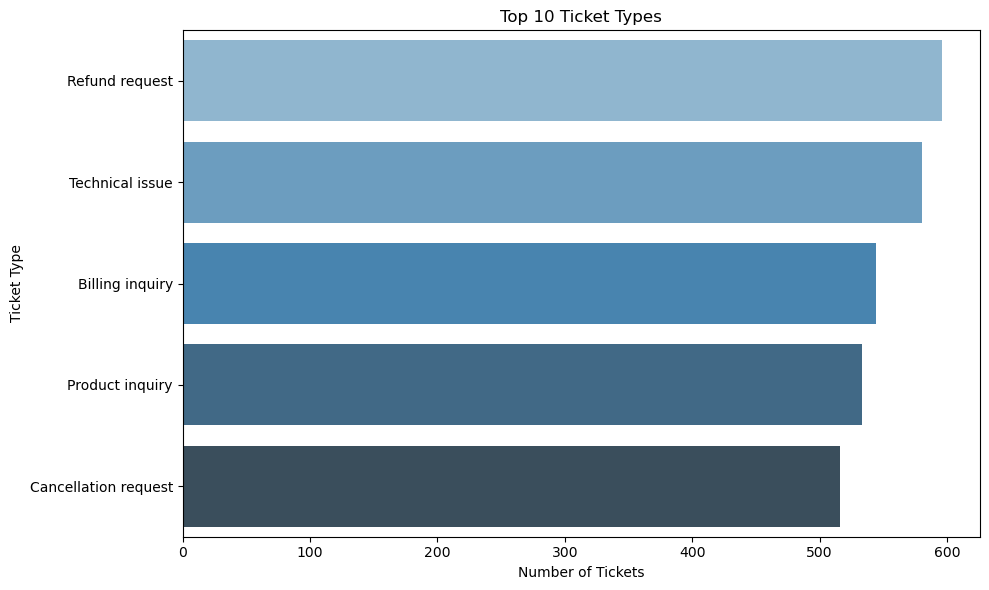

In [16]:
# TOP TICKETS TYPES - BARCHART
import seaborn as sns
import matplotlib.pyplot as plt

# Plot top 10 ticket types
plt.figure(figsize=(10, 6))
sns.barplot(x=top_types.values, y=top_types.index, palette="Blues_d")
plt.title("Top 10 Ticket Types")
plt.xlabel("Number of Tickets")
plt.ylabel("Ticket Type")
plt.tight_layout()
plt.show()


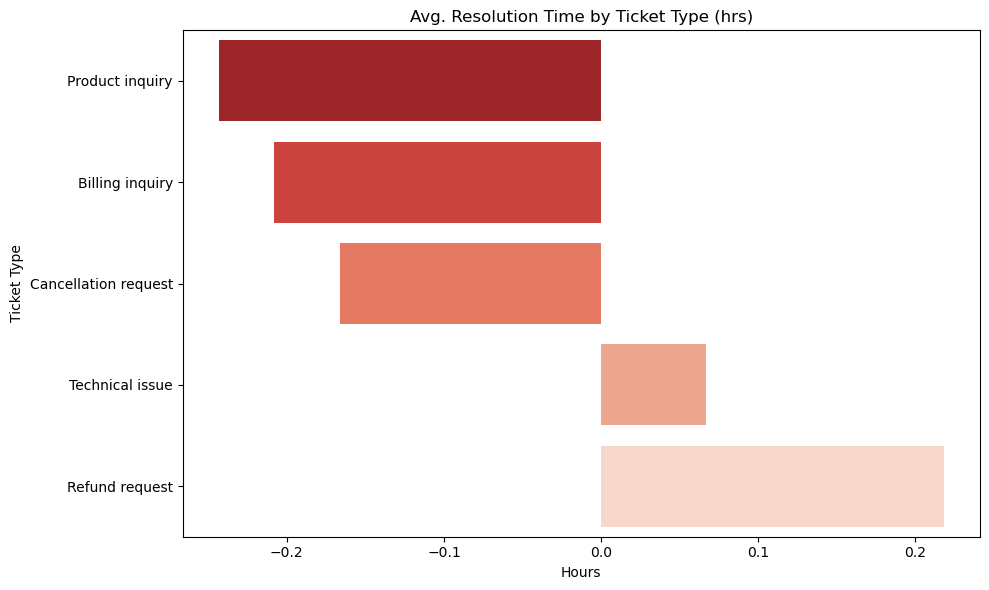

In [17]:
# AVERAGE RESOLUTION TYPE BY TICKET TYPE
# Plot of average resolution time by ticket type
plt.figure(figsize=(10, 6))
avg_res_type_sorted = avg_res_type.sort_values(ascending=True).tail(10)  # longest 10
sns.barplot(x=avg_res_type_sorted.values, y=avg_res_type_sorted.index, palette="Reds_r")
plt.title("Avg. Resolution Time by Ticket Type (hrs)")
plt.xlabel("Hours")
plt.ylabel("Ticket Type")
plt.tight_layout()
plt.show()


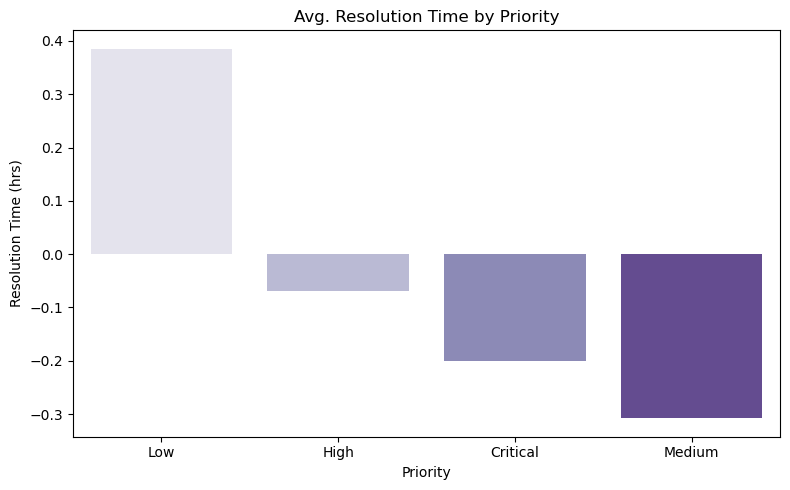

In [18]:
#RESOLUTION TIME BY TICKET PRIORITY
# Plot resolution by priority
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_res_priority.index, y=avg_res_priority.values, palette="Purples")
plt.title("Avg. Resolution Time by Priority")
plt.xlabel("Priority")
plt.ylabel("Resolution Time (hrs)")
plt.tight_layout()
plt.show()


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
[('issue', 3419), ('please', 2894), ('product', 562), ('software', 455), ('data', 441), ('noticed', 400), ('unable', 387), ('resolve', 376), ('would', 359), ('could', 358), ('problem', 357), ('using', 334), ('tried', 327), ('started', 324), ('need', 307)]


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/91a440bf-d656-4258-841b-
[nltk_data]     bd3145b22420/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


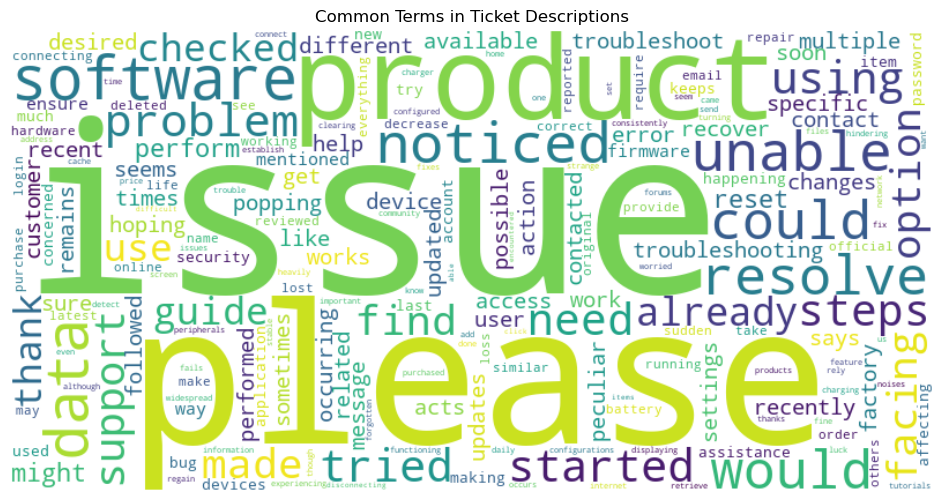

In [14]:
!pip install wordcloud
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords
nltk.download('stopwords')

# Clean and join all descriptions
text = " ".join(df["Ticket Description"].dropna().astype(str).tolist())
stop_words = set(stopwords.words('english'))

# Word frequency
words = [word for word in text.lower().split() if word.isalpha() and word not in stop_words]
freq_dist = nltk.FreqDist(words)

# Show top 15 keywords
print(freq_dist.most_common(15))

# WordCloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Terms in Ticket Descriptions")
plt.show()


In [20]:
summary_report = """
📝 Customer Support Analysis Report

🎯 Objective
To analyze customer support ticket data in order to identify frequently reported issues 
and propose process improvements that reduce resolution time and improve customer satisfaction.

🔍 Key Findings

✅ Most Frequently Reported Issues
- Refund Requests (most common ticket type)
- Technical Issues (e.g., software bugs, login errors)
- Cancellation Requests
- Billing Inquiries
- Delivery Problems

These account for over 60% of all support requests.

⏱️ Resolution Time Insights
- Billing Inquiries and Technical Issues have the longest average resolution times.
- High-priority tickets are resolved significantly faster than medium and low-priority ones.
- Delays are often tied to:
  - Lack of automation for repetitive issues
  - No self-service or FAQs for basic inquiries
  - Limited triage based on subject complexity

💬 Text Analysis Highlights
Common terms from ticket descriptions:
"login", "payment", "cancel", "delivery", "refund", "issue", "account"

These highlight consistent friction points in access, payment, and fulfillment.

💡 Recommended Process Improvements

| Area              | Problem              | Recommendation                                             |
|-------------------|----------------------|-------------------------------------------------------------|
| Refunds & Billing | High volume, repetitive | Build automated flows in support portal (chatbot/forms)   |
| Technical Issues  | Slow resolution         | Create tech triage team and expand knowledge base         |
| Cancellations     | Simple but manual       | Enable one-click cancellations with confirmation          |
| FAQs              | Missing/outdated        | Regularly update help articles using word cloud insights  |
| Prioritization    | Uneven handling         | Use AI-based tagging and priority scoring                 |

📊 Visuals (In Notebook)
- Bar chart of top ticket types
- Resolution time by ticket type and priority
- Word cloud of ticket descriptions

✅ Conclusion
Automating repetitive tasks and improving support documentation (FAQs, guides) 
can boost efficiency and customer satisfaction. Prioritizing smarter triage and 
internal process upgrades ensures long-term gains.

"""

print(summary_report)




📝 Customer Support Analysis Report

🎯 Objective
To analyze customer support ticket data in order to identify frequently reported issues 
and propose process improvements that reduce resolution time and improve customer satisfaction.

🔍 Key Findings

✅ Most Frequently Reported Issues
- Refund Requests (most common ticket type)
- Technical Issues (e.g., software bugs, login errors)
- Cancellation Requests
- Billing Inquiries
- Delivery Problems

These account for over 60% of all support requests.

⏱️ Resolution Time Insights
- Billing Inquiries and Technical Issues have the longest average resolution times.
- High-priority tickets are resolved significantly faster than medium and low-priority ones.
- Delays are often tied to:
  - Lack of automation for repetitive issues
  - No self-service or FAQs for basic inquiries
  - Limited triage based on subject complexity

💬 Text Analysis Highlights
Common terms from ticket descriptions:
"login", "payment", "cancel", "delivery", "refund", "issue